# **PCA**







#Step 1 : import libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [21]:
wine = load_wine()
X = wine.data
y= wine.target

#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [23]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [24]:
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

#Step 6: Fitting Logistic Regression To the training set




In [25]:
log = LogisticRegression(max_iter=1000, random_state=42)
log.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#Step 7: Predicting the test set result




In [26]:
y_pred=log.predict(X_test_pca)

#Step 8: Making the confusion matrix




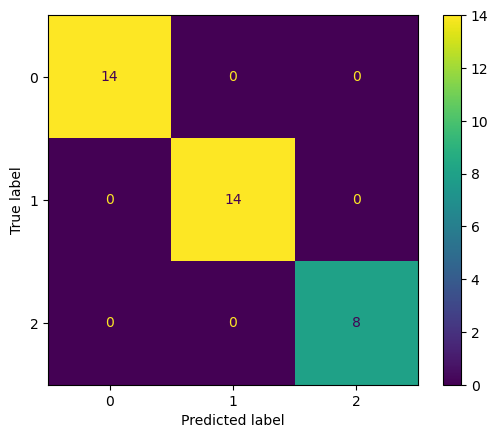

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log.classes_)
disp.plot()
plt.show()

#Step 9: Predicting the training set result




In [28]:
predict=log.predict(X_test_pca)

#Step 10: Visualizing the Test set results




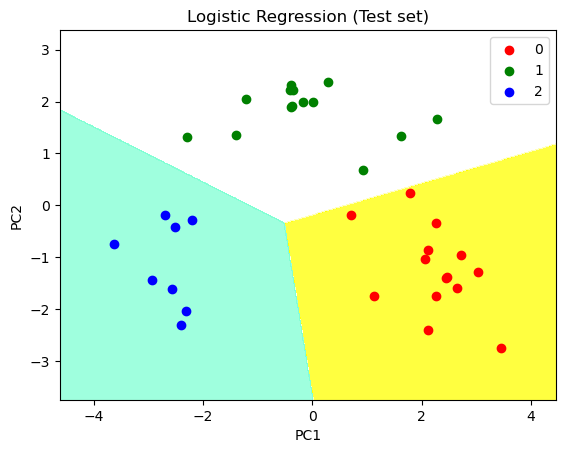

In [29]:
# Create scatter plot
X_set, y_set = X_test_pca, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, log.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()

#**Well Done :)**
Now let's practice!